In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

In [84]:
datam = pd.read_excel('database_bencana_mentah_update.xlsx')

In [85]:
datam = datam.drop_duplicates()

In [86]:
datam['banjir'].value_counts()

1    13580
0     2197
Name: banjir, dtype: int64

In [122]:
datam.to_excel('database_bencana_mentah_update.xlsx', index=False)

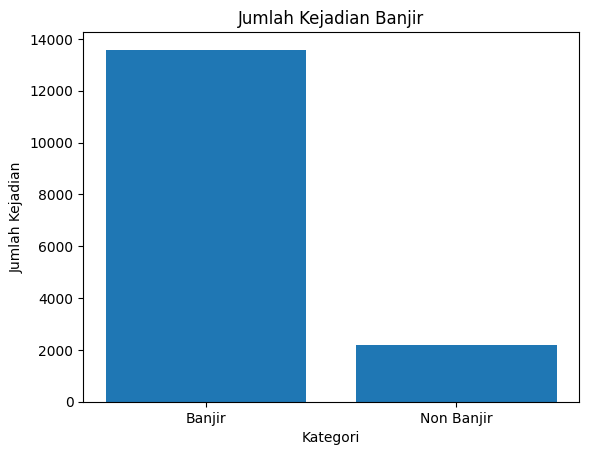

In [88]:
import matplotlib.pyplot as plt

# Memisahkan datam berdasarkan nilai variabel 'banjir'
banjir_datam = datam[datam['banjir'] == 1]
non_banjir_datam = datam[datam['banjir'] == 0]

# Menghitung jumlah kejadian banjir dan non banjir
banjir_count = banjir_datam.shape[0]
non_banjir_count = non_banjir_datam.shape[0]

# Membuat grafik batang
labels = ['Banjir', 'Non Banjir']
values = [banjir_count, non_banjir_count]

plt.bar(labels, values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Kejadian')
plt.title('Jumlah Kejadian Banjir')
plt.show()


In [29]:
# Memisahkan fitur dan label
X = data.drop('banjir', axis=1)
y = data['banjir']

# Membuat objek RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Melakukan undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

# Menggabungkan kembali fitur dan label yang telah diundersample
undersampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [30]:
undersampled_data['banjir'].value_counts()

0    2197
1    2197
Name: banjir, dtype: int64

In [ ]:
undersampled_data

In [33]:
undersampled_data.to_excel('data_bencana_resample_mentah_baru.xlsx', index=False)

In [56]:
data = pd.read_excel("data mentahan buat nasa power 2.xlsx")

In [46]:
data = undersampled_data

In [58]:
import datetime
import numpy as np
import pandas as pd
import requests
import json

RESOLUTIONS = ["hourly", "daily", "monthly", "climatology"]
COMMUNITIES = ["RE", "SB", "AG"]

def point(
    *, coordinates, parameters, start, end, resolution="daily", community="RE",
):
    # Validate and parse the coordinates
    if pd.api.types.is_list_like(coordinates):
        if len(coordinates) != 2:
            raise ValueError("Coordinate list should have 2 values")
        latitude, longitude = coordinates
    if isinstance(coordinates, dict):
        if "lat" not in coordinates:
            raise ValueError("Coordinates does not contain a 'lat' key")
        if "lon" not in coordinates.index:
            raise ValueError("Coordinates does not contain a 'lon' key")
        latitude = coordinates["lat"]
        longitude = coordinates["lon"]
    if isinstance(coordinates, pd.core.series.Series):
        if "lat" not in coordinates.index:
            raise ValueError("Coordinates does not have 'lat' in index")
        if "lat" not in coordinates.index:
            raise ValueError("Coordinates does not have 'lat' in index")
        latitude = coordinates["lat"]
        longitude = coordinates["lon"]
    if not isinstance(latitude, int) and not isinstance(latitude, float):
        raise TypeError("Latitude should be an integer or float")
    if not isinstance(longitude, int) and not isinstance(longitude, float):
        raise TypeError("Longitude should be an integer or float")
    if not isinstance(latitude, (int, float, str, np.number)):
        raise TypeError("Latitude should be a number")
    if not isinstance(longitude, (int, float, str, np.number)):
        raise TypeError("Longitude should be a number")
    if latitude < -90 or latitude > 90:
        raise ValueError("Latitude should be between -90 and 90")
    if longitude < 0 or longitude > 360:
        raise ValueError("Longitude should be between 0 and 360")

    # Validate the community
    if community not in COMMUNITIES:
        raise ValueError(f"Community should be one of {COMMUNITIES}")

    # Validate the parameters
    if not isinstance(parameters, list):
        raise TypeError("Parameters should be a list")

    # Validate the resolution
    if resolution not in RESOLUTIONS:
        raise TypeError(f"Resolution should be one of {RESOLUTIONS}")

    # Validate the start and end date
    if resolution in ["hourly", "daily"]:
        if not isinstance(start, (datetime.datetime, datetime.date)):
            raise TypeError("Start should be a datetime or date")
        if not isinstance(end, (datetime.datetime, datetime.date)):
            raise TypeError("End should be a datetime or date")
        if start < datetime.date(1982, 1, 1) or start > datetime.date.today():
            raise ValueError("Start should be between 1982 and today")
        if end < datetime.date(1982, 1, 1) or end > datetime.date.today():
            raise ValueError("End should be between 1982 and today")
        if start > end:
            raise ValueError("Start must be before end")
    else:
        if not isinstance(start, int):
            raise TypeError("Start should be an integer")
        if not isinstance(start, int):
            raise TypeError("End should be an integer")
        if start < 1982 or start > 2020:
            raise ValueError("Start should be between 1982 and 2020")
        if end < 1982 or end > 2020:
            raise ValueError("End should be between 1982 and 2020")
        if start > end:
            raise ValueError("Start must be before end")

    # Retrieve the data
    try:
        url = f"https://power.larc.nasa.gov/api/temporal/{resolution}/point"
        params = {
            "parameters": ",".join(parameters),
            "longitude": longitude,
            "latitude": latitude,
            "start": start.strftime("%Y%m%d"),
            "end": end.strftime("%Y%m%d"),
            "community": community,
            "format": "JSON",
        }
        response = requests.get(url=url, params=params, verify=True, timeout=60)
        content = json.loads(response.content.decode("utf-8"))
    except:
        raise Exception(f"Could not fetch the data")

    # Check if there are any error messages
    if len(content.get("messages", [])) > 0:
        raise Exception(content["messages"][0])

    # Check if there are any other error messages
    details = content.get("detail", [])
    if len(details):
        raise Exception(details[0].get("msg"))

    # Transform the data into a DataFrame
    data = pd.DataFrame(content["properties"]["parameter"])
    data.index = pd.to_datetime(data.index, format="%Y%m%d")

    # Return the data
    return data

In [59]:
# Tambahkan kolom data iklim ke dalam dataframe data
data["ALLSKY_SFC_SW_DWN"] = np.nan
data["ALLSKY_SFC_LW_DWN"] = np.nan
data["CLOUD_AMT"] = np.nan
data["TS"] = np.nan
data["PRECTOTCORR"] = np.nan
data["T10M"] = np.nan
data["T10M_MAX"] = np.nan
data["T10M_MIN"] = np.nan
data["WD10M"] = np.nan
data["WS10M"] = np.nan
data["WS10M_MAX"] = np.nan
data["RH2M"] = np.nan
data["QV2M"] = np.nan
data["TQV"] = np.nan
data["PS"] = np.nan
data["GWETTOP"] = np.nan
data["PW"] = np.nan
data["ALLSKY_KT"] = np.nan

In [60]:
data.columns

Index(['latitude', 'longitude', 'Meninggal', 'Hilang', 'Terluka', 'Menderita',
       'Mengungsi', 'Rumah', 'Fas_Pendidikan', 'Fas_Kesehatan',
       'Fas_Peribadatan', 'Fas_Umum', 'Perkantoran', 'Jembatan', 'Pabrik',
       'Pertokoan', 'tanggal', 'hari', 'bulan', 'tahun', 'hari_dalam_pekan',
       'pekan_ke', 'provinsi', 'kabupaten', 'banjir', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN', 'CLOUD_AMT', 'TS', 'PRECTOTCORR', 'T10M',
       'T10M_MAX', 'T10M_MIN', 'WD10M', 'WS10M', 'WS10M_MAX', 'RH2M', 'QV2M',
       'TQV', 'PS', 'GWETTOP', 'PW', 'ALLSKY_KT'],
      dtype='object')

In [61]:
from tqdm import tqdm

# Iterasi melalui setiap baris data dengan indikator progres
for i in tqdm(range(len(data))):
    latitude = data.at[i, "latitude"]
    longitude = data.at[i, "longitude"]
    tanggal = data.at[i, "tanggal"]

    # Ubah tanggal menjadi objek datetime.date
    tanggal_date = datetime.date(tanggal.year, tanggal.month, tanggal.day)

    # Ambil data iklim dari fungsi point
    daily_data = point(
        coordinates=(latitude, longitude),
        parameters=["ALLSKY_SFC_SW_DWN", "ALLSKY_SFC_LW_DWN", "CLOUD_AMT", "TS",
                    "PRECTOTCORR", "T10M", "T10M_MAX", "T10M_MIN", "WD10M", "WS10M",
                    "WS10M_MAX", "RH2M", "QV2M", 'TQV', 'PS', 'GWETTOP',
                    'PW', 'ALLSKY_KT'],
        start=tanggal_date,
        end=tanggal_date,
        resolution="daily",
        community="AG",
    )

    # Masukkan data iklim ke dalam dataframe data
    data.at[i, "ALLSKY_SFC_SW_DWN"] = daily_data["ALLSKY_SFC_SW_DWN"].values[0]
    data.at[i, "ALLSKY_SFC_LW_DWN"] = daily_data["ALLSKY_SFC_LW_DWN"].values[0]
    data.at[i, "CLOUD_AMT"] = daily_data["CLOUD_AMT"].values[0]
    data.at[i, "TS"] = daily_data["TS"].values[0]
    data.at[i, "PRECTOTCORR"] = daily_data["PRECTOTCORR"].values[0]
    data.at[i, "T10M"] = daily_data["T10M"].values[0]
    data.at[i, "T10M_MAX"] = daily_data["T10M_MAX"].values[0]
    data.at[i, "T10M_MIN"] = daily_data["T10M_MIN"].values[0]
    data.at[i, "WD10M"] = daily_data["WD10M"].values[0]
    data.at[i, "WS10M"] = daily_data["WS10M"].values[0]
    data.at[i, "WS10M_MAX"] = daily_data["WS10M_MAX"].values[0]
    data.at[i, "RH2M"] = daily_data["RH2M"].values[0]
    data.at[i, "QV2M"] = daily_data["QV2M"].values[0]
    data.at[i, "TQV"] = daily_data["TQV"]
    data.at[i, "PS"] = daily_data["PS"]
    data.at[i, "GWETTOP"] = daily_data["GWETTOP"]
    data.at[i, "PW"] = daily_data["PW"]
    data.at[i, "ALLSKY_KT"] = daily_data["ALLSKY_KT"]

100%|██████████| 2573/2573 [3:47:23<00:00,  5.30s/it]  


In [62]:
data.to_excel('hasil_bencana_baru_2.xlsx',index=False)

In [63]:
data = pd.read_excel("hasil_bencana_baru_banget nih.xlsx")

In [65]:
data = data.sort_values('tanggal')

In [67]:
# Mengganti nilai -999 dengan NaN agar dapat diimputasi
data.replace(-999, np.nan, inplace=True)

# Melakukan interpolasi linear pada nilai yang hilang
data = data.interpolate(method='pad')

In [69]:
data.columns

Index(['latitude', 'longitude', 'Meninggal', 'Hilang', 'Terluka', 'Menderita',
       'Mengungsi', 'Rumah', 'Fas_Pendidikan', 'Fas_Kesehatan',
       'Fas_Peribadatan', 'Fas_Umum', 'Perkantoran', 'Jembatan', 'Pabrik',
       'Pertokoan', 'tanggal', 'hari', 'bulan', 'tahun', 'hari_dalam_pekan',
       'pekan_ke', 'provinsi', 'kabupaten', 'banjir', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN', 'CLOUD_AMT', 'TS', 'PRECTOTCORR', 'T10M',
       'T10M_MAX', 'T10M_MIN', 'WD10M', 'WS10M', 'WS10M_MAX', 'RH2M', 'QV2M',
       'TQV', 'PS', 'GWETTOP', 'PW', 'ALLSKY_KT'],
      dtype='object')

In [ ]:
# Variabel yang akan dianalisis
variables = ['ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN', 'CLOUD_AMT', 'TS', 'PRECTOTCORR',
             'T10M', 'T10M_MAX', 'T10M_MIN', 'WD10M', 'WS10M', 'WS10M_MAX', 'RH2M',
             'QV2M', 'TQV', 'PS', 'GWETTOP', 'PW', 'ALLSKY_KT']

for variable in variables:
    unique_values = data[variable].unique()
    unique_values.sort()
    
    print(f"Nilai unik dan jumlahnya untuk variabel '{variable}':")
    for value in unique_values:
        count = data[data[variable] == value].shape[0]
        print(f"{value}: {count} kali")
    print()


In [74]:
data.to_excel("hasil_bencana_baru_banget nih.xlsx", index=False)

In [75]:
data.columns

Index(['latitude', 'longitude', 'Meninggal', 'Hilang', 'Terluka', 'Menderita',
       'Mengungsi', 'Rumah', 'Fas_Pendidikan', 'Fas_Kesehatan',
       'Fas_Peribadatan', 'Fas_Umum', 'Perkantoran', 'Jembatan', 'Pabrik',
       'Pertokoan', 'tanggal', 'hari', 'bulan', 'tahun', 'hari_dalam_pekan',
       'pekan_ke', 'provinsi', 'kabupaten', 'banjir', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN', 'CLOUD_AMT', 'TS', 'PRECTOTCORR', 'T10M',
       'T10M_MAX', 'T10M_MIN', 'WD10M', 'WS10M', 'WS10M_MAX', 'RH2M', 'QV2M',
       'TQV', 'PS', 'GWETTOP', 'PW', 'ALLSKY_KT'],
      dtype='object')

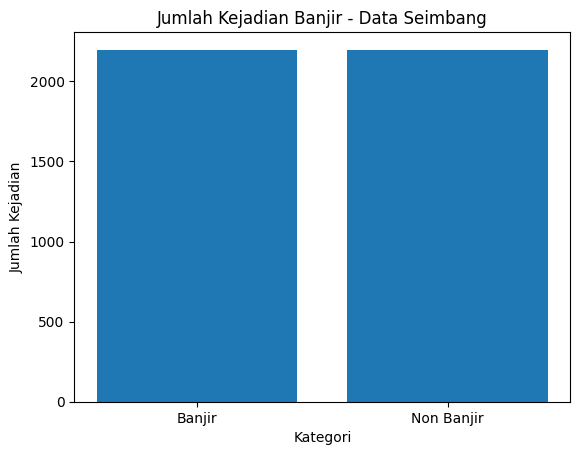

In [89]:
import matplotlib.pyplot as plt

# Memisahkan data berdasarkan nilai variabel 'banjir'
banjir_data = data[data['banjir'] == 1]
non_banjir_data = data[data['banjir'] == 0]

# Menghitung jumlah kejadian banjir dan non banjir
banjir_count = banjir_data.shape[0]
non_banjir_count = non_banjir_data.shape[0]

# Membuat grafik batang
labels = ['Banjir', 'Non Banjir']
values = [banjir_count, non_banjir_count]

plt.bar(labels, values)
plt.xlabel('Kategori')
plt.ylabel('Jumlah Kejadian')
plt.title('Jumlah Kejadian Banjir - Data Seimbang')
plt.show()


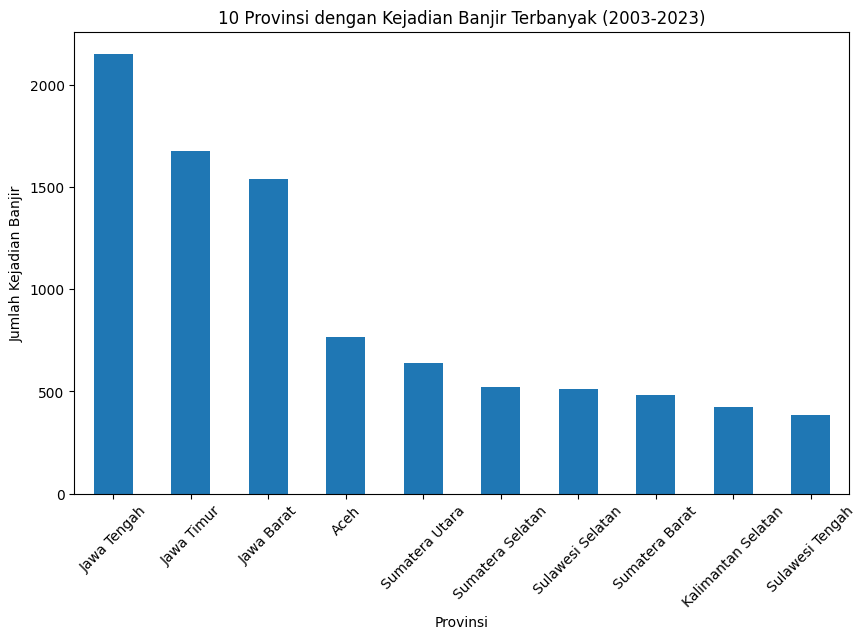

In [96]:
# Menghitung jumlah kejadian banjir per provinsi
provinsi_counts = datam[datam['banjir'] == 1]['provinsi'].value_counts().nlargest(10)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
provinsi_counts.plot(kind='bar')
plt.xlabel('Provinsi')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Kejadian Banjir')
plt.title('10 Provinsi dengan Kejadian Banjir Terbanyak (2003-2023)')
plt.show()

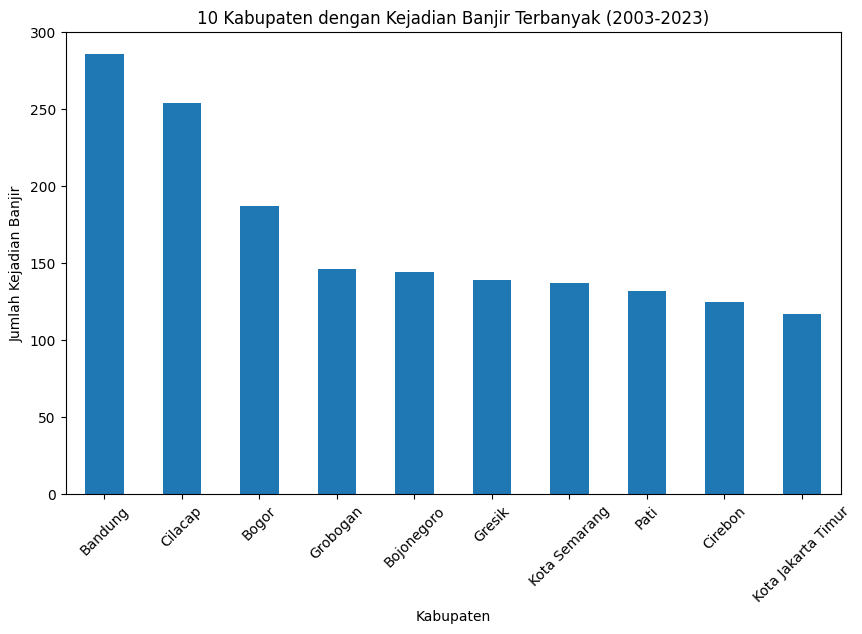

In [95]:
# Menghitung jumlah kejadian banjir per kabupaten
kabupaten_counts = datam[datam['banjir'] == 1]['kabupaten'].value_counts().nlargest(10)

# Membuat grafik batang
plt.figure(figsize=(10, 6))
kabupaten_counts.plot(kind='bar')
plt.xlabel('Kabupaten')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Kejadian Banjir')
plt.title('10 Kabupaten dengan Kejadian Banjir Terbanyak (2003-2023)')
plt.show()


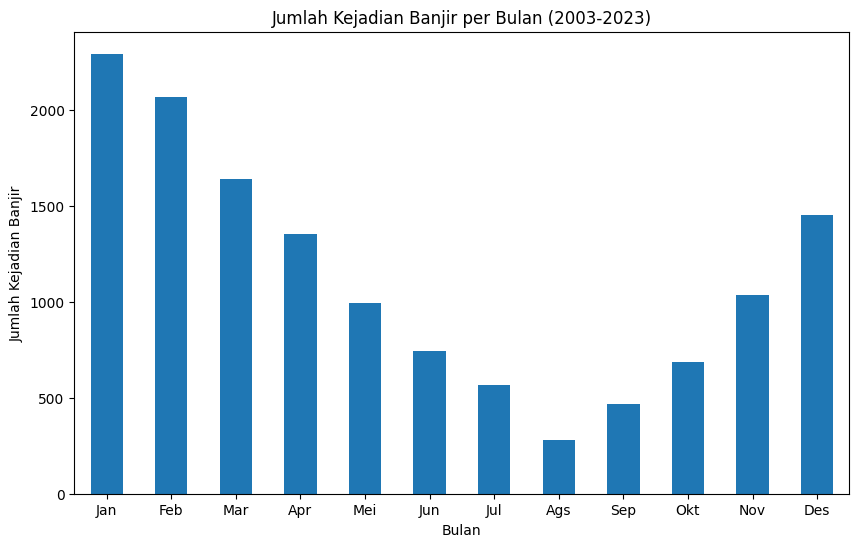

In [106]:
# Menghitung jumlah kejadian banjir per bulan
bulan_counts = datam[datam['banjir'] == 1]['bulan'].value_counts().sort_index()

# Membuat grafik batang
plt.figure(figsize=(10, 6))
bulan_counts.plot(kind='bar')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejadian Banjir')
plt.title('Jumlah Kejadian Banjir per Bulan (2003-2023)')

# Mengatur urutan label bulan
bulan_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
plt.xticks(range(len(bulan_labels)), bulan_labels)
plt.xticks(rotation=0)
plt.show()


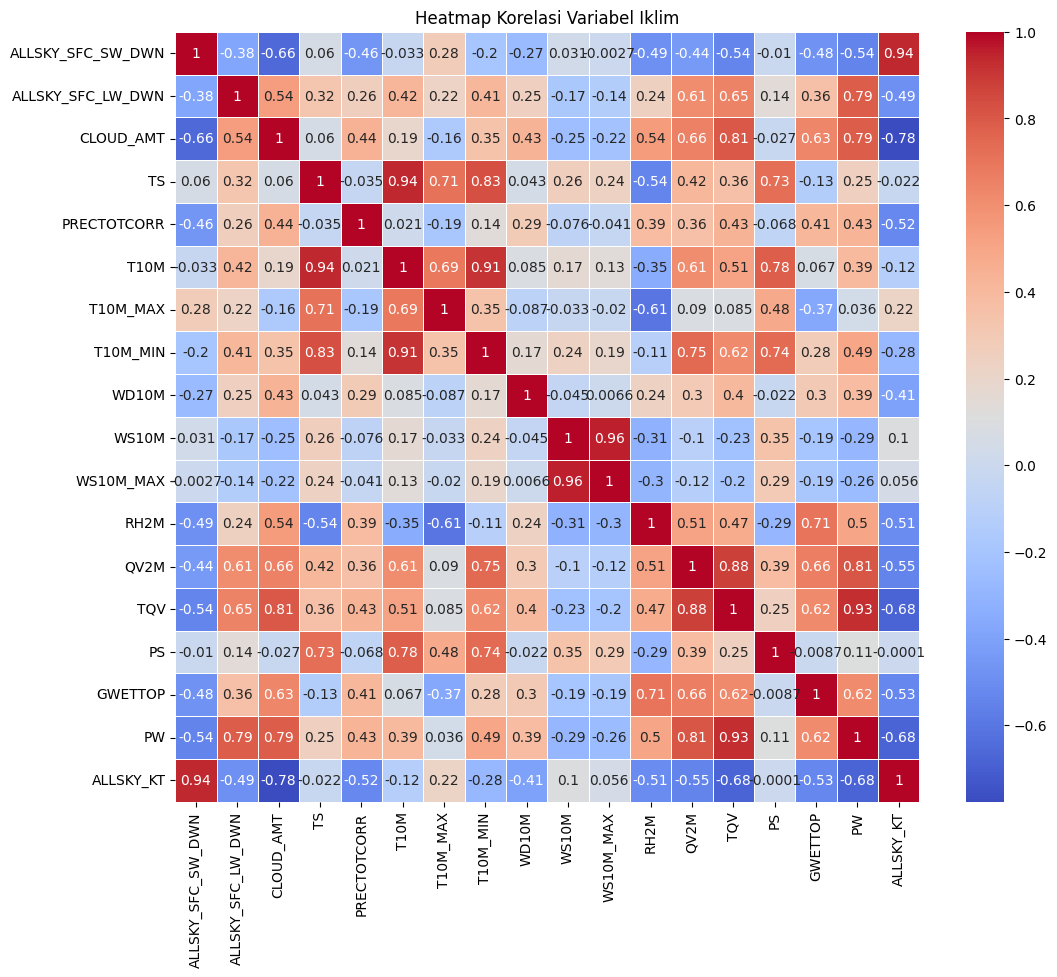

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih variabel yang akan digunakan
variables = ['ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN', 'CLOUD_AMT', 'TS', 'PRECTOTCORR', 'T10M', 'T10M_MAX', 'T10M_MIN', 'WD10M', 'WS10M', 'WS10M_MAX', 'RH2M', 'QV2M', 'TQV', 'PS', 'GWETTOP', 'PW', 'ALLSKY_KT']

# Mengambil subset data dengan variabel yang dipilih
subset_data = data[variables]

# Menghitung matriks korelasi
correlation_matrix = subset_data.corr()

# Membuat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Iklim')
plt.show()

In [112]:
data.columns

Index(['latitude', 'longitude', 'Meninggal', 'Hilang', 'Terluka', 'Menderita',
       'Mengungsi', 'Rumah', 'Fas_Pendidikan', 'Fas_Kesehatan',
       'Fas_Peribadatan', 'Fas_Umum', 'Perkantoran', 'Jembatan', 'Pabrik',
       'Pertokoan', 'tanggal', 'hari', 'bulan', 'tahun', 'hari_dalam_pekan',
       'pekan_ke', 'provinsi', 'kabupaten', 'banjir', 'ALLSKY_SFC_SW_DWN',
       'ALLSKY_SFC_LW_DWN', 'CLOUD_AMT', 'TS', 'PRECTOTCORR', 'T10M',
       'T10M_MAX', 'T10M_MIN', 'WD10M', 'WS10M', 'WS10M_MAX', 'RH2M', 'QV2M',
       'TQV', 'PS', 'GWETTOP', 'PW', 'ALLSKY_KT'],
      dtype='object')

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Membuat peta awal dengan koordinat pusat
map = folium.Map(location=[-2.5489, 118.0149], zoom_start=4)

# Membuat cluster marker untuk titik-titik kejadian banjir
cluster_banjir = MarkerCluster(name='Banjir').add_to(map)

# Menambahkan marker untuk setiap titik kejadian banjir
for index, row in datam[datam['banjir'] == 1].iterrows():
    lat = row['latitude']
    lon = row['longitude']
    popup = f"Tanggal: {row['tanggal']}\nMeninggal: {row['Meninggal']}\nHilang: {row['Hilang']}\nTerluka: {row['Terluka']}\nMenderita: {row['Menderita']}\nMengungsi: {row['Mengungsi']}\nRumah: {row['Rumah']}\nFas_Pendidikan: {row['Fas_Pendidikan']}\nFas_Kesehatan: {row['Fas_Kesehatan']}\nFas_Peribadatan: {row['Fas_Peribadatan']}\nFas_Umum: {row['Fas_Umum']}\nPerkantoran: {row['Perkantoran']}\nJembatan: {row['Jembatan']}\nPabrik: {row['Pabrik']}\nPertokoan: {row['Pertokoan']}"
    folium.Marker(location=[lat, lon], popup=popup).add_to(cluster_banjir)

# Menambahkan kontrol layer pada peta
folium.LayerControl().add_to(map)

# Menampilkan peta
map